In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../dane/przetworzone/sumy_laureaty_2014_znorm.csv", low_memory=False)

In [3]:
przedmioty_pdst = [col for col in df.columns if "podstawowa" in col]
przedmioty_rozsz = [col for col in df.columns if "rozszerzona" in col]
przedmioty = przedmioty_pdst + przedmioty_rozsz

In [4]:
przedmioty_dict = {s: s.replace("_", " ").replace("j ", "j. ") for s in przedmioty}

In [5]:
df = df.loc[:,przedmioty]

In [6]:
korelacje = df.rename(columns=przedmioty_dict).corr()

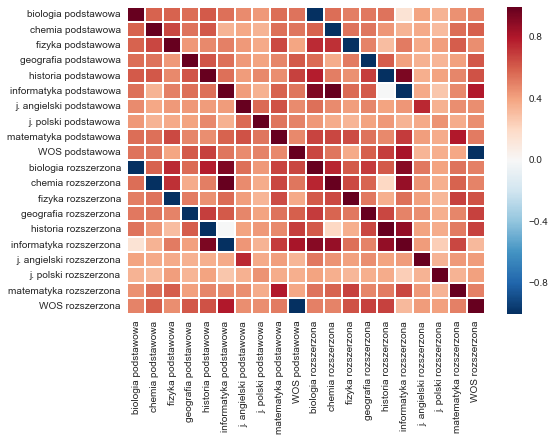

In [7]:
sns.heatmap(korelacje)

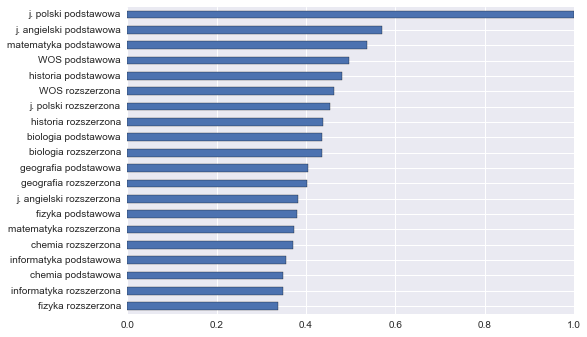

In [8]:
korelacje["j. polski podstawowa"].order().plot(kind='barh')

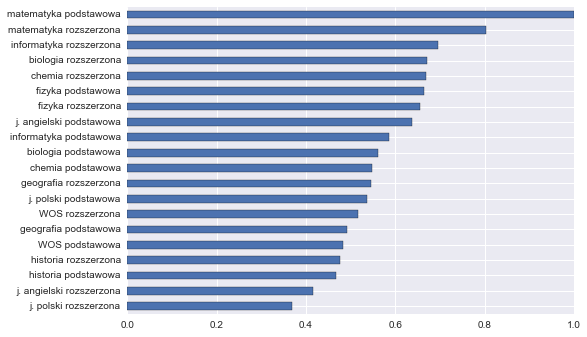

In [9]:
korelacje["matematyka podstawowa"].order().plot(kind='barh')

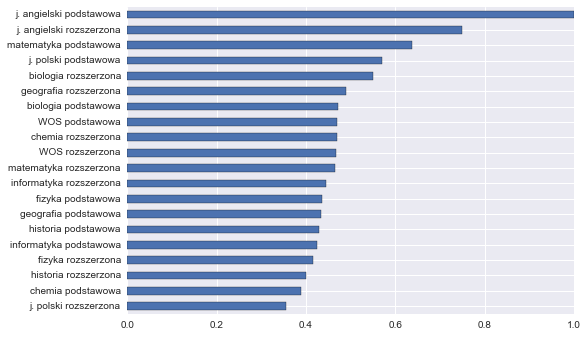

In [10]:
korelacje["j. angielski podstawowa"].order().plot(kind='barh')

In [69]:
korelacje_rok = {}
for rok in range(2010, 2015):
    df = pd.read_csv("../dane/przetworzone/sumy_laureaty_{}_znorm.csv".format(rok), low_memory=False)
    korelacje_rok[rok] = df.loc[:, przedmioty].rename(columns=przedmioty_dict).corr()

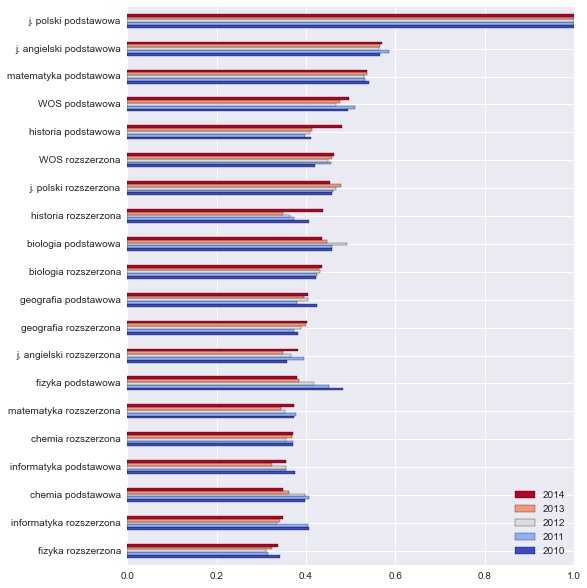

In [12]:
pd.DataFrame({k: v["j. polski podstawowa"] for k, v in korelacje_rok.items()}) \
  .sort(columns=2014) \
  .plot(kind="barh", figsize=(8,10), colormap="coolwarm", legend="reverse")

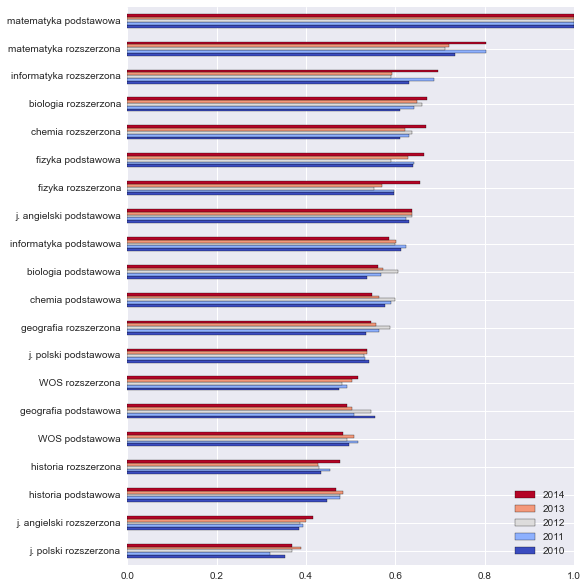

In [13]:
pd.DataFrame({k: v["matematyka podstawowa"] for k, v in korelacje_rok.items()}) \
  .sort(columns=2014) \
  .plot(kind="barh", figsize=(8,10), colormap="coolwarm", legend="reverse")

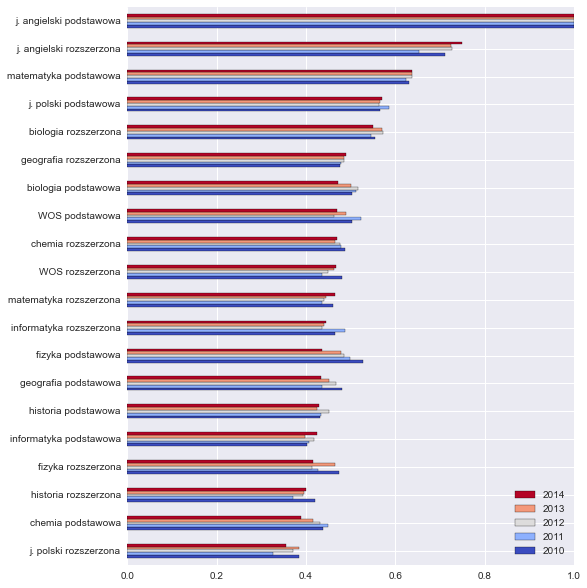

In [14]:
pd.DataFrame({k: v["j. angielski podstawowa"] for k, v in korelacje_rok.items()}) \
  .sort(columns=2014) \
  .plot(kind="barh", figsize=(8,10), colormap="coolwarm", legend="reverse")

In [22]:
plt.subplots?

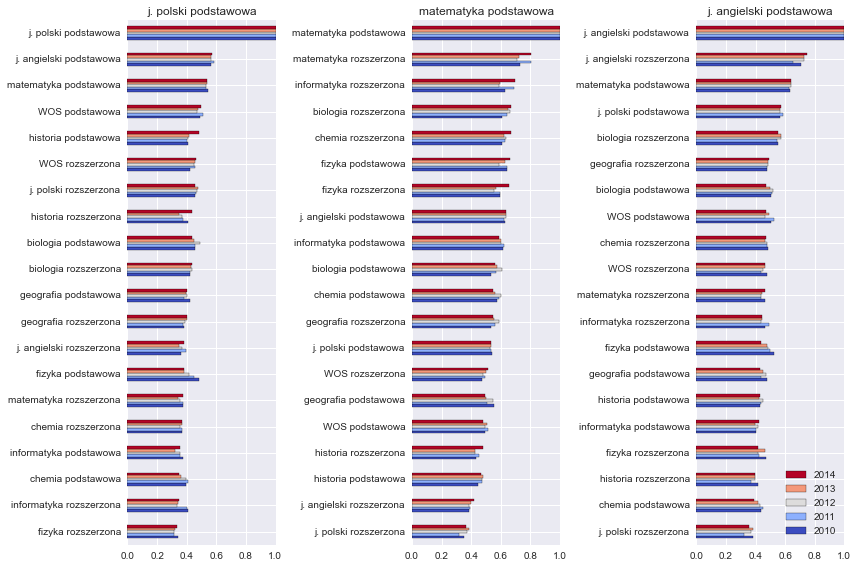

In [43]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

pd.DataFrame({k: v["j. polski podstawowa"] for k, v in korelacje_rok.items()}) \
  .sort(columns=2014) \
  .plot(kind="barh", colormap="coolwarm", legend=False, ax=ax1, title="j. polski podstawowa")

pd.DataFrame({k: v["matematyka podstawowa"] for k, v in korelacje_rok.items()}) \
  .sort(columns=2014) \
  .plot(kind="barh", colormap="coolwarm", legend=False, ax=ax2, title="matematyka podstawowa")

pd.DataFrame({k: v["j. angielski podstawowa"] for k, v in korelacje_rok.items()}) \
  .sort(columns=2014) \
  .plot(kind="barh", colormap="coolwarm", legend="reverse", ax=ax3, title="j. angielski podstawowa")

plt.tight_layout()

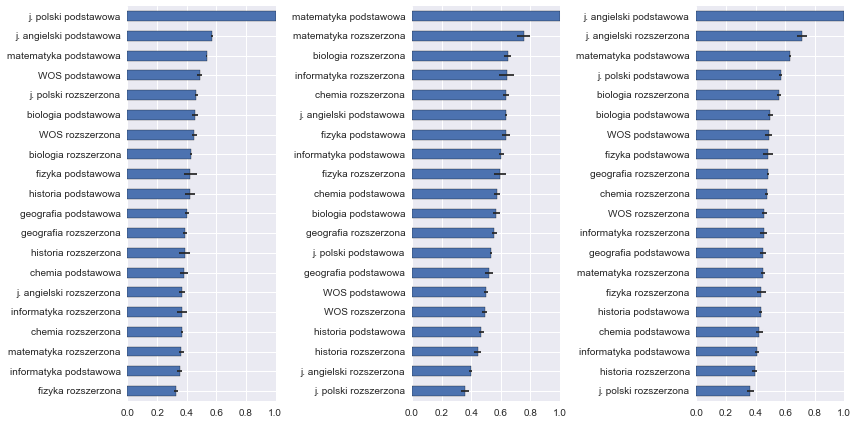

In [40]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))

tmp = pd.DataFrame({k: v["j. polski podstawowa"] for k, v in korelacje_rok.items()}).transpose()
tmp.mean().order().plot(kind="barh", xerr=tmp.std(), ax=ax1)

tmp = pd.DataFrame({k: v["matematyka podstawowa"] for k, v in korelacje_rok.items()}).transpose()
tmp.mean().order().plot(kind="barh", xerr=tmp.std(), ax=ax2)

tmp = pd.DataFrame({k: v["j. angielski podstawowa"] for k, v in korelacje_rok.items()}).transpose()
tmp.mean().order().plot(kind="barh", xerr=tmp.std(), ax=ax3)

plt.tight_layout()



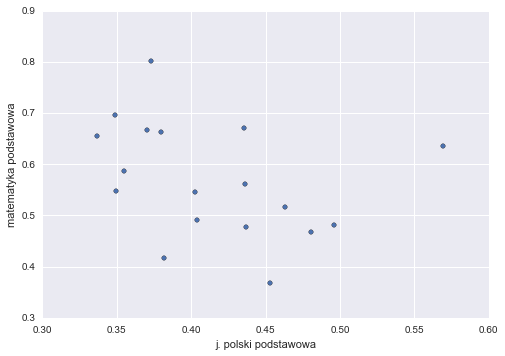

In [15]:
korelacje_rok[2014] \
  .drop("j. polski podstawowa") \
  .drop("matematyka podstawowa") \
  .plot(kind='scatter', x='j. polski podstawowa', y='matematyka podstawowa')

In [16]:
# można w ggplot, coś jak laureatów, ale później, bo teraz mi się nie chce / nie mam czasu

In [44]:
%load_ext rpy2.ipython

In [111]:
kors_list = []
for rok, kor in korelacje_rok.items():
    kor2 = kor.copy()
    kor2["rok"] = rok
    kor2['przedmiot'] = [" ".join(przed.split()[:-1]) for przed in kor2.index]
    kor2['stopien'] = [przed.split()[-1] for przed in kor2.index]
    kor2.reset_index(inplace=True)
    kors_list.append(kor2)
kors = pd.concat(kors_list)
kors = kors[(kors['j. polski podstawowa'] < 0.95) & (kors['matematyka podstawowa'] < 0.95)]

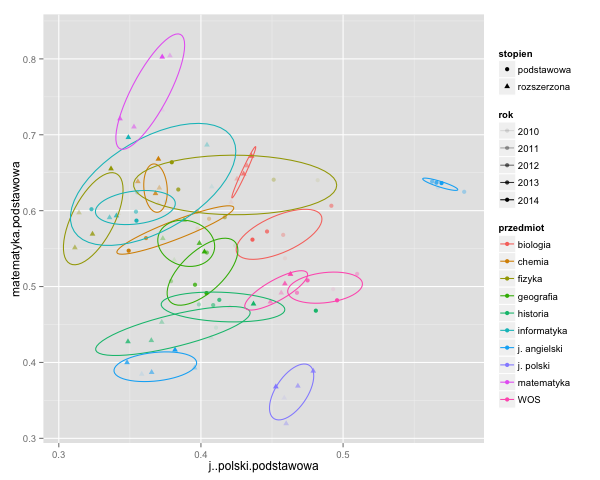

In [116]:
%%R -i kors -w 600
library(ggplot2)
library(dplyr)

ggplot(kors, aes(j..polski.podstawowa, `matematyka.podstawowa`, color=przedmiot, shape=stopien, alpha=rok)) +
  geom_point() +
  stat_ellipse(level = 0.7)